In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mu = np.atleast_2d([1, 1])
sigma_1 = 4.
sigma_2 = 2.
corr = 0.8
Sigma = np.array([
    [sigma_1 ** 2, corr * sigma_1 * sigma_2],
    [corr * sigma_1 * sigma_2, sigma_2 ** 2]
])
A = np.linalg.cholesky(Sigma)
data = mu + np.dot(A, np.random.normal(size=(2, 1000))).T

In [3]:
mu_estimate = np.mean(data, axis=0)
std_estimate = np.std(data, axis=0)
print mu_estimate, std_estimate

[1.01505173 1.06509329] [4.0606951  2.09110029]


No handlers could be found for logger "matplotlib.legend"


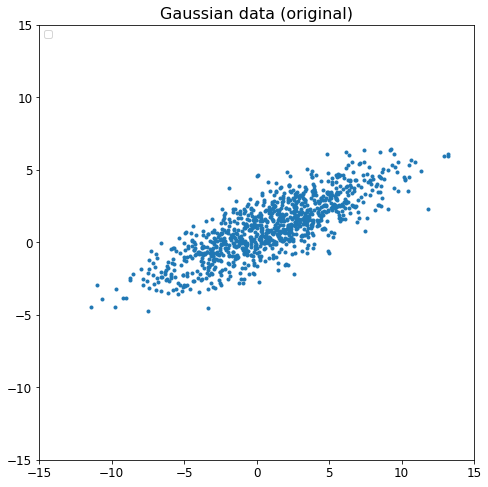

In [4]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data[:, 0], data[:, 1], '.')
    
ax.set_aspect('equal')
ax.axis('square')
ax.legend(loc='upper left')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_title('Gaussian data (original)', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

In [5]:
data_standardized = (data - mu_estimate) / std_estimate

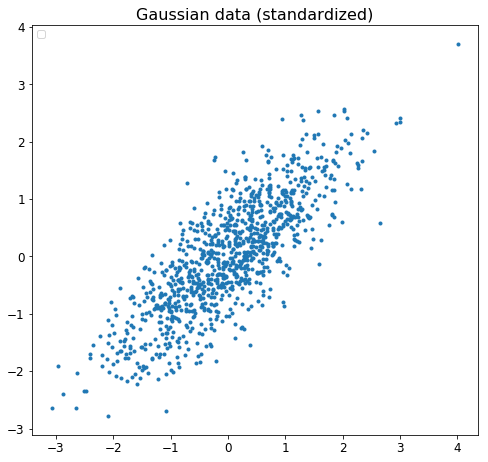

In [6]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], '.')
    
ax.set_aspect('equal')
ax.legend(loc='upper left')
# ax.set_xlim(-4, 9)
# ax.set_ylim(-0.02, 0.4)
ax.set_title('Gaussian data (standardized)', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

In [7]:
U, S, V = np.linalg.svd(np.cov(data_standardized.T))

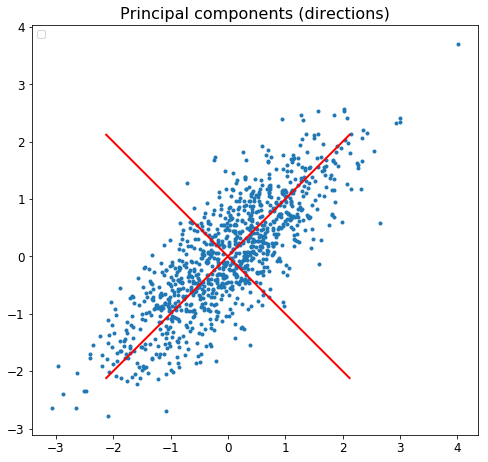

In [8]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], '.')

for u in U:
    start =  -3. * u
    end = 3. * u
    ax.plot([start[0], end[0]], [start[1], end[1]], 'r', linewidth=2)
#     print start, end
#     ax.annotate(
#         '$e_1$', xy=end, xycoords='data',
#         xytext=start, textcoords='data',
#         arrowprops=dict(facecolor='red', width=2.0))
    
ax.set_aspect('equal')
ax.legend(loc='upper left')
# ax.set_xlim(-4, 9)
# ax.set_ylim(-0.02, 0.4)
ax.set_title('Principal components (directions)', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

In [9]:
data_projected_PC1 = np.atleast_2d(np.dot(data_standardized, U[:, 0])).T * np.atleast_2d(U[:, 0])

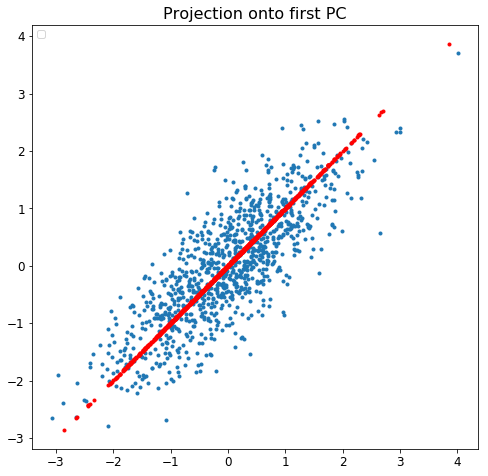

In [10]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], '.')
ax.plot(data_projected_PC1[:, 0], data_projected_PC1[:, 1], 'r.')

ax.set_aspect('equal')
ax.legend(loc='upper left')
# ax.set_xlim(-4, 9)
# ax.set_ylim(-0.02, 0.4)
ax.set_title('Projection onto first PC', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

In [11]:
std_PC1 = np.std(np.dot(data_standardized, U[:, 0]))

In [12]:
print std_PC1 ** 2, S[0]

1.8062155958206145 1.8080236194400554


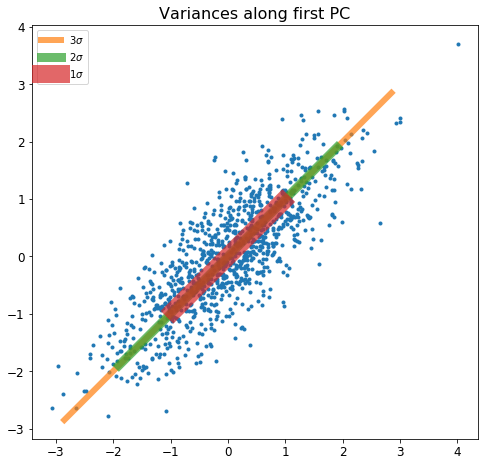

In [13]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], '.')
# ax.plot(data_projected_PC1[:, 0], data_projected_PC1[:, 1], 'r.')

for u in U[:1, :]:
    for std_factor in reversed(xrange(1, 4)):
        start = -std_factor * std_PC1 * u
        end = std_factor * std_PC1 * u
        ax.plot([start[0], end[0]], [start[1], end[1]], 
                linewidth=3 * 1 * 2 * 3 / std_factor, alpha=0.7,
               label='${} \sigma$'.format(std_factor))
    
ax.set_aspect('equal')
ax.legend(loc='upper left')
# ax.set_xlim(-4, 9)
# ax.set_ylim(-0.02, 0.4)
ax.set_title('Variances along first PC', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

In [14]:
data_projected_PC2 = np.atleast_2d(np.dot(data_standardized, U[:, 1])).T * np.atleast_2d(U[:, 1])

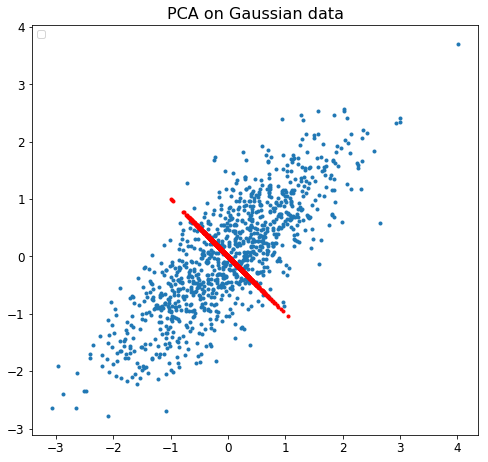

In [15]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], '.')
ax.plot(data_projected_PC2[:, 0], data_projected_PC2[:, 1], 'r.')
    
ax.set_aspect('equal')
ax.legend(loc='upper left')
# ax.set_xlim(-4, 9)
# ax.set_ylim(-0.02, 0.4)
ax.set_title('PCA on Gaussian data', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

In [16]:
std_PC2 = np.std(np.dot(data_standardized, U[:, 1]))

In [17]:
print std_PC2 ** 2, S[1]

0.19378440417938478 0.19397838256194697


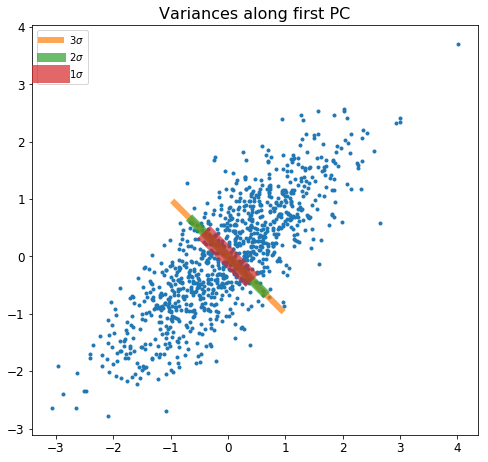

In [18]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], '.')
# ax.plot(data_projected_PC1[:, 0], data_projected_PC1[:, 1], 'r.')

for u in U[1:2, :]:
    for std_factor in reversed(xrange(1, 4)):
        start = -std_factor * std_PC2 * u
        end = std_factor * std_PC2 * u
        ax.plot([start[0], end[0]], [start[1], end[1]], 
                linewidth=3 * 1 * 2 * 3 / std_factor, alpha=0.7,
               label='${} \sigma$'.format(std_factor))
    
ax.set_aspect('equal')
ax.legend(loc='upper left')
# ax.set_xlim(-4, 9)
# ax.set_ylim(-0.02, 0.4)
ax.set_title('Variances along first PC', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

In [65]:
x_shift = np.linspace(15, 20, 10)
y_shift = x_shift - 10
shift = np.vstack((x_shift, y_shift)).T
outliers1 = shift + np.random.normal(size=(10, 2))

In [66]:
outliers1

array([[14.33444844,  4.10010562],
       [16.80728546,  4.5787206 ],
       [16.41968381,  5.86403711],
       [17.72892349,  6.03889967],
       [17.70593133,  8.53293502],
       [18.24646013,  7.4905777 ],
       [20.46877083,  8.27480209],
       [18.04313831,  8.94700912],
       [17.38184852,  9.35962937],
       [21.30392152, 10.48906922]])

In [67]:
outliers1_standardized = (outliers1 - mu_estimate) / std_estimate

In [68]:
outliers1_projected_PC1 = np.atleast_2d(np.dot(outliers1_standardized, U[:, 0])).T * np.atleast_2d(U[:, 0])

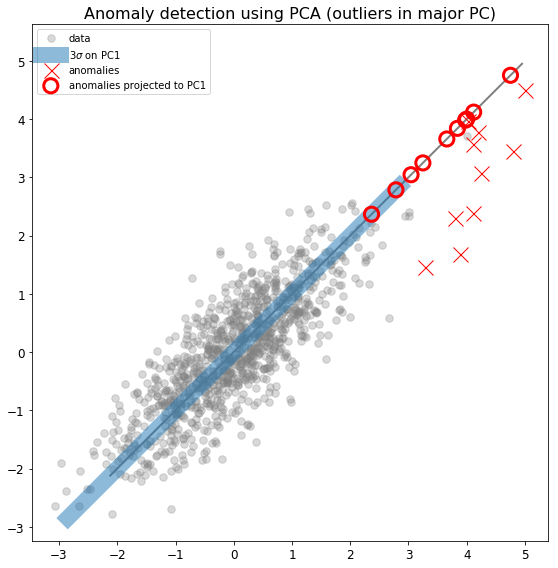

In [78]:
f, ax = subplots(figsize=(8, 8))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], 
        '.', color='0.5', label='data', alpha=0.3, ms=15)
# ax.plot(data[:, 0], data[:, 1], '.')
# ax.plot(outliers1[:, 0], outliers1[:, 1], 'rx', ms=15)


for u in U[:1, :]:
    start =  -7. * u
    end = 3. * u
    ax.plot([start[0], end[0]], [start[1], end[1]], 'gray', linewidth=2)

for u in U[:1, :]:
    for std_factor in reversed(xrange(3, 4)):
        start = -std_factor * std_PC1 * u
        end = std_factor * std_PC1 * u
        ax.plot([start[0], end[0]], [start[1], end[1]], 
                linewidth=16, alpha=0.5,
               label='${} \sigma$ on PC1'.format(std_factor))

ax.plot(outliers1_standardized[:, 0], outliers1_standardized[:, 1], 
        'rx', ms=15, label='anomalies')
ax.scatter(outliers1_projected_PC1[:, 0], outliers1_projected_PC1[:, 1],
           facecolors='none', edgecolors='r', linewidths=3,
           s=200, label='anomalies projected to PC1', zorder=10)


ax.set_aspect('equal')
ax.axis('square')
ax.legend(loc='upper left')
# ax.set_xlim(-4, 9)
# ax.set_ylim(-0.02, 0.4)
ax.set_title('Anomaly detection using PCA (outliers in major PC)', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
plt.tight_layout()


plt.savefig('pca_anomaly_detection_1.pdf')

In [91]:
x_shift = np.linspace(3, 8, 10)
y_shift = x_shift - 10
shift = np.vstack((x_shift, y_shift)).T
outliers2 = shift + np.random.normal(size=(10, 2))

In [92]:
outliers2

array([[ 3.12183136, -7.01058821],
       [ 4.60920143, -7.76993175],
       [ 5.58282927, -7.06660443],
       [ 5.40435928, -5.89719863],
       [ 4.82022711, -6.35081097],
       [ 5.83211052, -4.44459701],
       [ 6.19332979, -2.16723465],
       [ 7.87847536, -4.58460667],
       [ 8.14147394, -2.78088687],
       [ 7.44234101, -0.03777915]])

In [93]:
outliers2_standardized = (outliers2 - mu_estimate) / std_estimate

In [94]:
outliers2_projected_PC1 = np.atleast_2d(np.dot(outliers2_standardized, U[:, 0])).T * np.atleast_2d(U[:, 0])

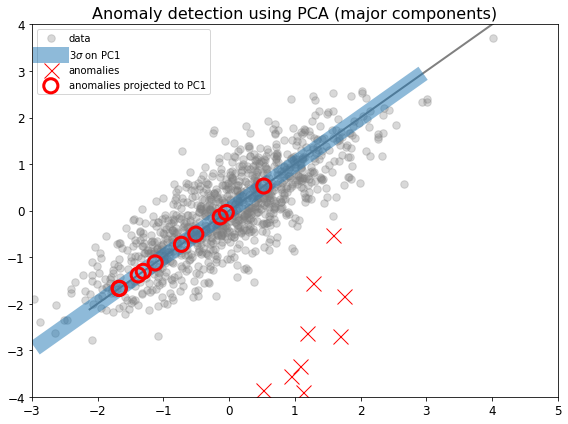

In [95]:
f, ax = subplots(figsize=(8, 6))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], 
        '.', color='0.5', label='data', alpha=0.3, ms=15)
# ax.plot(data[:, 0], data[:, 1], '.')
# ax.plot(outliers1[:, 0], outliers1[:, 1], 'rx', ms=15)


for u in U[:1, :]:
    start =  -7. * u
    end = 3. * u
    ax.plot([start[0], end[0]], [start[1], end[1]], 'gray', linewidth=2)

for u in U[:1, :]:
    for std_factor in reversed(xrange(3, 4)):
        start = -std_factor * std_PC1 * u
        end = std_factor * std_PC1 * u
        ax.plot([start[0], end[0]], [start[1], end[1]], 
                linewidth=16, alpha=0.5,
               label='${} \sigma$ on PC1'.format(std_factor))

ax.plot(outliers2_standardized[:, 0], outliers2_standardized[:, 1], 
        'rx', ms=15, label='anomalies')
# ax.plot(outliers2_projected_PC1[:, 0], outliers2_projected_PC1[:, 1], 'ro', 
#         ms=10, label='projected anomalies')
ax.scatter(outliers2_projected_PC1[:, 0], outliers2_projected_PC1[:, 1],
           facecolors='none', edgecolors='r', linewidths=3,
           s=200, label='anomalies projected to PC1', zorder=10)


# ax.set_aspect('equal')
# ax.axis('square')
ax.legend(loc='upper left')
ax.set_xlim(-3, 5)
ax.set_ylim(-4, 4)
ax.set_title('Anomaly detection using PCA (major components)', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
plt.tight_layout()


plt.savefig('pca_anomaly_detection_2.pdf')

In [96]:
outliers2_projected_PC2 = np.atleast_2d(np.dot(outliers2_standardized, U[:, 1])).T * np.atleast_2d(U[:, 1])

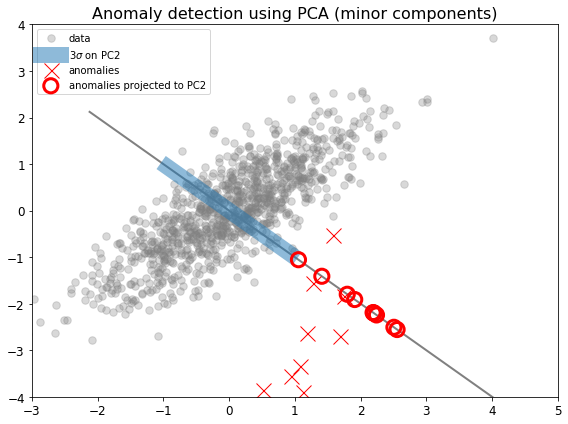

In [97]:
f, ax = subplots(figsize=(8, 6))
ax.plot(data_standardized[:, 0], data_standardized[:, 1], 
        '.', color='0.5', label='data', alpha=0.3, ms=15)
# ax.plot(data[:, 0], data[:, 1], '.')
# ax.plot(outliers1[:, 0], outliers1[:, 1], 'rx', ms=15)


for u in U[1:2, :]:
    start =  -7. * u
    end = 3. * u
    ax.plot([start[0], end[0]], [start[1], end[1]], 'gray', linewidth=2)

for u in U[1:2, :]:
    for std_factor in reversed(xrange(3, 4)):
        start = -std_factor * std_PC2 * u
        end = std_factor * std_PC2 * u
        ax.plot([start[0], end[0]], [start[1], end[1]], 
                linewidth=16, alpha=0.5,
               label='${} \sigma$ on PC2'.format(std_factor))

ax.plot(outliers2_standardized[:, 0], outliers2_standardized[:, 1], 
        'rx', ms=15, label='anomalies')
# ax.plot(outliers2_projected_PC1[:, 0], outliers2_projected_PC1[:, 1], 'ro', 
#         ms=10, label='projected anomalies')
ax.scatter(outliers2_projected_PC2[:, 0], outliers2_projected_PC2[:, 1],
           facecolors='none', edgecolors='r', linewidths=3,
           s=200, label='anomalies projected to PC2', zorder=10)


# ax.set_aspect('equal')
# ax.axis('square')
ax.legend(loc='upper left')
ax.set_xlim(-3, 5)
ax.set_ylim(-4, 4)
ax.set_title('Anomaly detection using PCA (minor components)', fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
plt.tight_layout()


plt.savefig('pca_anomaly_detection_3.pdf')